In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
df_fert = pd.read_csv('NewFertFile.csv')
df_crop = pd.read_csv('NewCropFile.csv')
df_state = pd.read_csv('raw_districtwise_yield_data.csv')

In [3]:
df_state.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
state_vals = df_state['Crop'].unique()
state_vals

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [10]:
df_state.shape

(246091, 7)

In [5]:
def applychanges(i):
    i = i.replace(' ','')
    i = i.lower()
    return i

In [6]:
df_state['Crop'] = df_state['Crop'].apply(lambda x:applychanges(x))

In [7]:
state_vals = df_state['Crop'].unique()
state_vals

array(['arecanut', 'otherkharifpulses', 'rice', 'banana', 'cashewnut',
       'coconut', 'dryginger', 'sugarcane', 'sweetpotato', 'tapioca',
       'blackpepper', 'drychillies', 'otheroilseeds', 'turmeric', 'maize',
       'moong(greengram)', 'urad', 'arhar/tur', 'groundnut', 'sunflower',
       'bajra', 'castorseed', 'cotton(lint)', 'horse-gram', 'jowar',
       'korra', 'ragi', 'tobacco', 'gram', 'wheat', 'masoor', 'sesamum',
       'linseed', 'safflower', 'onion', 'othermisc.pulses', 'samai',
       'smallmillets', 'coriander', 'potato', 'otherrabipulses',
       'soyabean', 'beans&mutter(vegetable)', 'bhindi', 'brinjal',
       'citrusfruit', 'cucumber', 'grapes', 'mango', 'orange',
       'otherfibres', 'otherfreshfruits', 'othervegetables', 'papaya',
       'pomefruit', 'tomato', 'rapeseed&mustard', 'mesta',
       'cowpea(lobia)', 'lemon', 'pomegranet', 'sapota', 'cabbage',
       'peas(vegetable)', 'nigerseed', 'bottlegourd', 'sannhamp',
       'varagu', 'garlic', 'ginger', 'oi

In [8]:
crop_vals = df_crop['label'].unique()
fert_vals = df_fert['Crop'].unique()
print(len(crop_vals),len(fert_vals))

22 22


In [11]:
to_use = []
for i in crop_vals:
    if i in state_vals:
        to_use.append(i)
        
        
print(to_use)

['rice', 'maize', 'blackgram', 'lentil', 'banana', 'mango', 'grapes', 'watermelon', 'apple', 'orange', 'papaya', 'coconut', 'jute', 'coffee']


In [12]:
len(to_use)

14

## EDA 

In [24]:
def getstats(i):
    plt.figure(figsize=(15,7))
    plt.plot(df_fert[i])

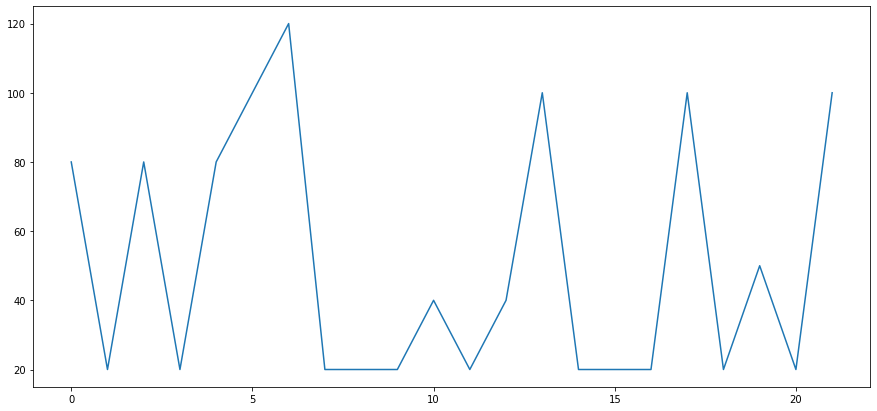

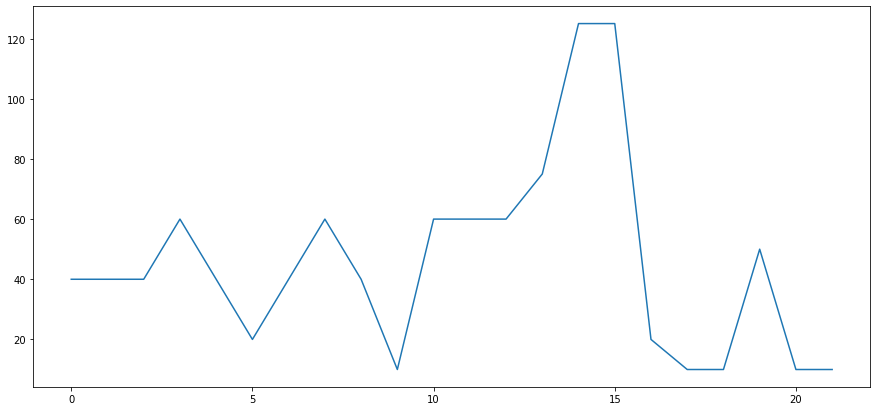

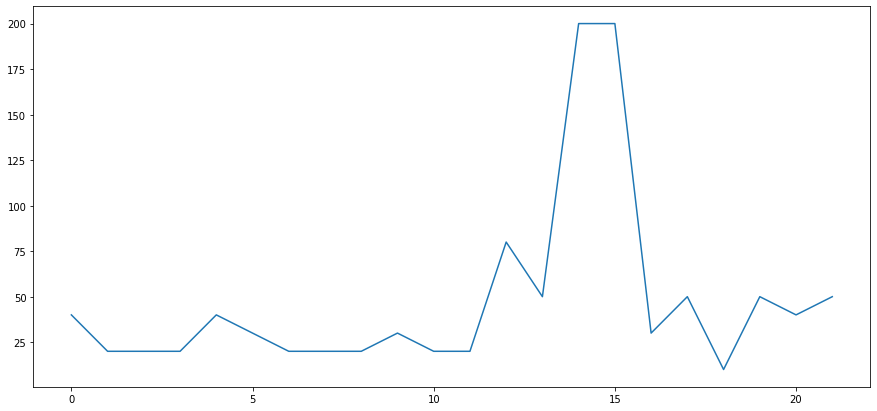

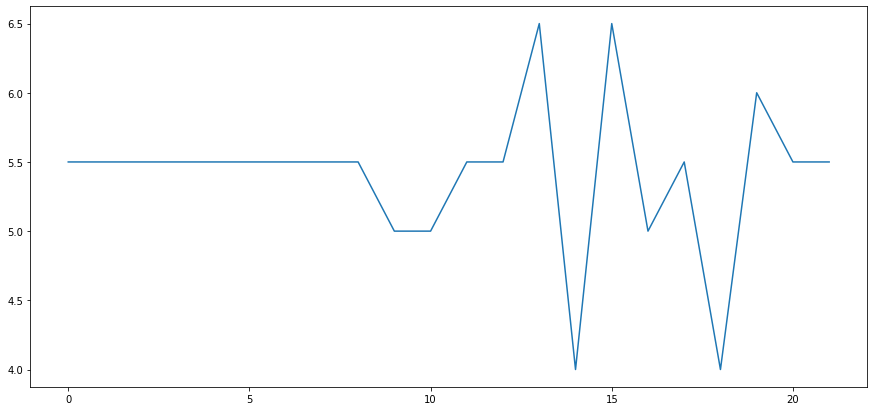

In [25]:
for i in df_fert.columns[2:]:
    getstats(i)
    

In [26]:
temp = df_fert

In [32]:
final_val = pd.DataFrame(columns=['N','P','K'])
for i in range(0,df_crop.shape[0]):
    crop = df_crop.label.iloc[i]
    Nitro = temp[temp['Crop']==crop]["N"].iloc[0]+random.randint(-20,20)
    Phos = temp[temp['Crop']==crop]["P"].iloc[0]+random.randint(-20,20)
    pota = temp[temp['Crop']==crop]["K"].iloc[0]+random.randint(-20,20)
    temp_dict = {'N':Nitro,'P':Phos,'K':pota}
    
    final_val = final_val.append(temp_dict,ignore_index=True)

In [33]:
final_val

,N,P,K
0,79,34,37
1,78,21,20
2,92,31,34
3,98,38,45
4,79,53,43
...,...,...,...
2195,97,1,30
2196,86,39,43
2197,109,16,35
2198,112,26,46


In [13]:
crop = df_crop.label.iloc[1]
crop

'rice'

In [14]:
a = df_fert[df_fert['Crop'] == crop]["N"].iloc[0]
a

80

In [34]:
df_crop["N"] = final_val["N"]
df_crop["P"] = final_val["P"]
df_crop["K"] = final_val["K"]

In [35]:
df_crop.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,79,34,37
1,1,21.770462,80.319644,7.038096,226.655537,rice,78,21,20
2,2,23.004459,82.320763,7.840207,263.964248,rice,92,31,34
3,3,26.491096,80.158363,6.980401,242.864034,rice,98,38,45
4,4,20.130175,81.604873,7.628473,262.717340,rice,79,53,43


In [36]:
df_crop.columns

Index(['Unnamed: 0', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'N',
       'P', 'K'],
      dtype='object')

In [37]:
df_crop = df_crop[['N','P','K','temperature', 'humidity', 'ph', 'rainfall', 'label']]
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,rice
1,78,21,20,21.770462,80.319644,7.038096,226.655537,rice
2,92,31,34,23.004459,82.320763,7.840207,263.964248,rice
3,98,38,45,26.491096,80.158363,6.980401,242.864034,rice
4,79,53,43,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
df_crop.to_csv('To_Use_data.csv')